In [3]:
# 모델정의
# 1. Sequential API

from tensorflow.keras import models
from tensorflow.keras.layers import Dense
model = tf.keras.Sequential()

In [5]:
# Sequential 객체에 은닉층 추가...
model.add(Dense(4, activation='sigmoid', input_shape=(4, ),  name= "dense1"))
model.add(Dense(4, activation='sigmoid', input_shape=(4, ),  name= "dense2"))
model.add(Dense(4, activation='sigmoid', input_shape=(4, ),  name= "dense3"))

d:\tensorflow\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 2. Functional API

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model       # Model은 함수형(Functional API)를 사용할 때 사용한다.
inputs = Input(shape(5,))   # --- 입력층(열(특성)다섯 개를 입력으로 받음) 
x = Dense(8, activation="relu")(inputs) # 은닉층1
x = Dense(4, activation="relu")(x)      # 은닉층2
x = Dense(1, activation="softmax")(x)   # 출력층
model = Model(inputs, x)

In [8]:
# Functional API를 부모로 클래스 생성하는 방법 - Model Subclassing API
class ResNet(tf.keras.Model):
    def __init__(self):
        super(ResNet, self).__init__()
        self.block_1 = layers.Dense(32, activation='relu')
        self.block_2 = layers.Dense(num_classes, activation='sigmoid')
    def call(self, inputs):
        x = self.block_1(inputs)
        return self.block_2(x)

In [ ]:
# 모델 컴파일
# - 모델을 훈련하기 전에 필요한 파라미터 정의
# - 사전에 정의할 파라미터
#   - 옵티마이저 : 데이터와 손실 함수를 바탕으로 모델 업데이트 방법을 결정
#   - 손실함수   : 훈련하는동안 출력과 실제 값(정답) 사이의 오차를 측정
#   - 지표        : 훈련과 테스트(검증) 단계 모니터링하여 모델의 성능을 측정

# 컴파일 예시

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ⓐ 아담(Adam) 옵티마이저를 사용합니다.
# ⓑ sparse_categorical_crossentropy는 다중 분류에서 사용되는 손실 함수입니다.
# ⓒ 'accuracy'는 훈련에 대한 정확도를 나타내는 것으로, 값이 1에 가까울수록 좋은 모델이라고 할 수 있습니다.

In [ ]:
# 모델 훈련
# 앞에서 만들어진 모형(모델)을가지고 학습
# fit() 메서드를 사용하여 모델을 훈련

model.fit(x_train, y_train, epochs=10, batch_size=100,
          validation_data=(x_test, y_test), verbose=2)
# x_train : 훈련 데이터(훈련으로 입력할 데이터)
# y_train : 정답(label) 데이터셋
# epochs  : 훈련 데이터셋을 몇 번 반복할지 결정
# batch_size : 몇 개의 샘플로 가중치를 갱신할지 결정
# validation_data : 검증 데이터셋을 넣어주면 한 epoch이 끝날 때마다 자동으로 검증
#                   정확도를 함께 출력함 여기서 출력되는 정확도는 진행을 보여줌
# verbose : 학습 진행 상황을 보여주는 정도를 의미 1이상이면  보여줌.

In [ ]:
# 모델 평가
model.evaluate(x_test, y_test, batch_size=32)

In [ ]:
# 모델 사용
model.predict(y_test)


In [ ]:
# 2.4 코드 맛보기...
# car_evaluation.csv  데이터의 컬럼(7개) 내용
'''
price(자동차 가격)

maint(자동차 유지 비용)

doors(자동차 문 개수)

persons(수용 인원)

lug_capacity(수하물 용량)

safety(안전성)

output(차 상태)

'''
%pip install pandas         
%pip install matplotlib     
%pip install seaborn        
%pip install scikit-learn   

In [10]:
%pip list | findstr pandas
%pip list | findstr matplotlib
%pip list | findstr seaborn
%pip list | findstr scikit-learn

pandas                   2.2.3
Note: you may need to restart the kernel to use updated packages.
matplotlib               3.10.0
matplotlib-inline        0.1.7
Note: you may need to restart the kernel to use updated packages.
seaborn                  0.13.2
Note: you may need to restart the kernel to use updated packages.
scikit-learn             1.6.1
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
# pandas에서 dataframe으로 csv파일을 읽어 올 수 있는 함수를 가지고 있음
# pd.read_csv() 함수로 이용해서 데이터를 데이터 프레임으로 불러옴
cars = pd.read_csv('../tensorflow/data/car_evaluation.csv', names=cols, header=None)

In [12]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

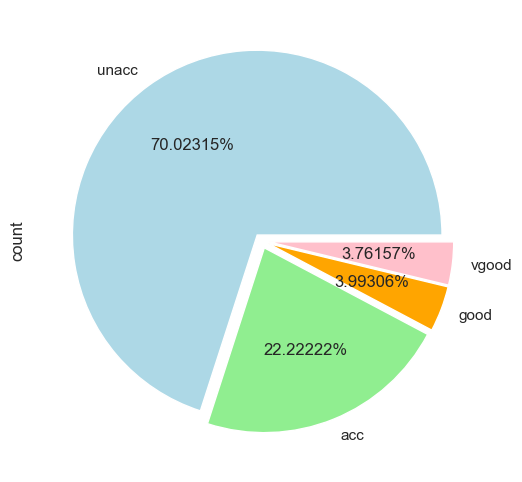

In [38]:
# output에 대한 데이터 분포를 파이 차트(원형 차트)
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
# plot() 그래프 그리기 함수...
# kind : 도표 종류
# autopct : 표시 단위
cars.output.value_counts().plot(kind='pie', autopct="%.05f%%",
                                colors=['lightblue', 'lightgreen', 'orange', 'pink'],
                                explode=(0.04, 0.04, 0.04, 0.04))

In [17]:
plt.rcParams['figure.figsize']

[8.0, 6.0]

In [21]:
cars.output
cars.output.value_counts()

output
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [56]:
# 전처리 작업 - output의 범위 정보를 변환하기 위한 작업
# 원 핫 인코딩
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')
doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis=1)
y = labels.values 

In [57]:
price
maint
doors
persons
lug_capacity
safety
labels
X
y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [58]:
# 데이터셋을 훈련과 검증의 용도로 분리...
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X,y : X는 훈련용데이터 , y는 레이블
# test_size : 전체 중 훈련용을 사용할 데이터 비율
# random_state : 랜덤값 덩어리

In [61]:
# 데이터 값 크기 확인
len(x_train) + len(x_test)
len(y_train) + len(y_test)

1728

In [72]:
# 모델 생성

from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
# 옵션에 들어갈 값은 shape=(x, y) -> x는 데이터의 column , y는 데이터의 row 
input_layer = Input(shape=(X.shape[1],)) # 입력층
dense_layer_1 = Dense(15, activation='relu')(input_layer) # 은닉층1
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1) # 은닉층2
output = Dense(y.shape[1], activation='softmax')(dense_layer_2) # 출력층

model = Model(inputs=input_layer, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 15)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534 (2.09 KB)

 Trainable params: 534 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# 모델 훈련
history = model.fit(x_train, y_train, batch_size=8, epochs=50, verbose=1,
                    validation_split=0.2)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 3.3068e-05 - val_acc: 0.9928 - val_loss: 0.0541
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 2.3562e-05 - val_acc: 0.9892 - val_loss: 0.0581
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 2.5247e-05 - val_acc: 0.9892 - val_loss: 0.0553
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 2.5268e-05 - val_acc: 0.9892 - val_loss: 0.0598
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 2.4770e-05 - val_acc: 0.9928 - val_loss: 0.0568
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 2.3063e-05 - val_acc: 0.9892 - val_loss: 0.0576
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 2.0894e-05 - val_acc: 0.9928 - val_loss: 0.0594
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 2.2367e-05 - val_acc: 0.9892 - val_loss: 0.0574
Epoch 9/50
139/139 ━━━━━

In [77]:
# 모델 평가
score = model.evaluate(x_test, y_test, verbose=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9899 - loss: 0.0871     


In [79]:
print("Test Score :" , score[0])
print("Test Accuracy :" , score[1])

Test Score : 0.0794893205165863
Test Accuracy : 0.9913294911384583


In [80]:
# 텐서 보드 사용..(훈련 과정 모니터링)
# 1. log_dir 지정(./logs/fit/)
log_dir = "logs/fit"
# 2. 텐서 보드 콜백함수(tensorborad_callback)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train,
          y=y_train,
          epochs=5,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9962 - loss: 0.0099 - val_acc: 0.9913 - val_loss: 0.0847
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 8.6412e-04 - val_acc: 0.9827 - val_loss: 0.0861
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 1.4514e-04 - val_acc: 0.9827 - val_loss: 0.0814
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 5.6214e-05 - val_acc: 0.9855 - val_loss: 0.0764
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 7.2070e-05 - val_acc: 0.9855 - val_loss: 0.0747


In [81]:
!tensorboard --logdir=./logs/fit/

^C


In [82]:
# 3장 머신러닝 알고리즘
# 1) 지도학습
# K-최근접 이웃
import numpy as np                  # 벡터 및 행렬의 연산 처리를 위한 라이브러리
import matplotlib.pyplot as plt     # 데이터를 차트나 플롯(plot)으로 그려 주는 라이브러리
import pandas as pd                 # 데이터 분석 및 조작을 위한 라이브러리
from sklearn import metrics         # 모델 성능 평가

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv('./data/iris.data', names=names, header=None)

In [85]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [128]:
# x 학습 데이터..
# y 레이블
X = dataset.iloc[:,0:-1].values # class를 뺀 값들을 array로 전달...
y = dataset.iloc[:, 4].values   # class만 전달... 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [104]:
len(X_train) + len(X_test)

150

In [105]:
y_test

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [129]:
from sklearn.preprocessing import StandardScaler
# 특성 스케일링, 평균 0, 표준편차가 1이 되도록 변환
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [130]:
# k-최근접 이웃 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)   # 모델 훈련

KNeighborsClassifier(n_neighbors=50)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test) # 모델 예측
print("정확도 : {} ".format(accuracy_score(y_test, y_pred))) # 모델 평가

In [143]:
# 최적의 k값 찾기
k = 10
acc_array = np.zeros(k) # 최적값을 처리를 위한 저장공간 생성 배열(10)
for k in np.arange(1, k+1, 1): # 1부터 10까지 1씩 증가
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc
max_acc = np.amax(acc_array) # 최대값
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도 :", max_acc, "으로 최적의 k는", k+1, "입니다.")

정확도 : 0.9666666666666667 으로 최적의 k는 6 입니다.


In [1]:
iris = data

NameError: name 'data' is not defined